#### Librarys:

In [1]:
import re
import tweepy as tw
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
consumer_key= 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
consumer_secret= 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_token= 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_token_secret= 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
#### USER INPUTS ####
search_words = "#throwbacktuesday"
num = 100

In [5]:
new_search = search_words + " -filter:retweets"

In [6]:
date_since = "2018-11-16" #year-month-date
tweets = tw.Cursor(api.search, 
                           q=new_search,
                           lang="en",
                           since=date_since,
                           tweet_mode='extended'
                   ).items(num)

users_locs=[[tweet.user.screen_name, tweet.created_at, tweet.full_text, TextBlob(tweet.full_text).sentiment.polarity] for tweet in tweets]     #tweet.user.screen_name

In [7]:
tweet_data = pd.DataFrame(data = users_locs, columns=["User Name","Posted time" ,"Content", "Sentiment"])
tweet_data.head()

,User Name,Posted time,Content,Sentiment
0,KirstyHodgson16,2020-09-16 06:18:53,How has it been 4 years already since Holly jo...,0.0
1,jenisecook,2020-09-16 05:46:31,#ThrowbackTuesday \n\nA favorite 50-word story...,0.5
2,kadharamkaushik,2020-09-16 05:38:14,The door way to the happy place on earth.\n\nP...,0.8
3,arpingajjar,2020-09-16 04:57:46,Today's Top story: Ahmedabad Headlines @ashind...,0.5
4,GoldensexyIce,2020-09-16 04:48:07,#tbt #throwbacktuesday 🏀🏀💗 #hitthefloor 🏀 Devi...,0.0


#### Data Preprocessing:

In [8]:
def senti(sentiment):
  if sentiment < 0 :
    return 'Negative'

  elif sentiment > 0:
    return 'Positive'

  else :
    return 'Neutral'
    
tweet_data['Sentiment'] = tweet_data['Sentiment'].apply(senti)
tweet_data.head()

,User Name,Posted time,Content,Sentiment
0,KirstyHodgson16,2020-09-16 06:18:53,How has it been 4 years already since Holly jo...,Neutral
1,jenisecook,2020-09-16 05:46:31,#ThrowbackTuesday \n\nA favorite 50-word story...,Positive
2,kadharamkaushik,2020-09-16 05:38:14,The door way to the happy place on earth.\n\nP...,Positive
3,arpingajjar,2020-09-16 04:57:46,Today's Top story: Ahmedabad Headlines @ashind...,Positive
4,GoldensexyIce,2020-09-16 04:48:07,#tbt #throwbacktuesday 🏀🏀💗 #hitthefloor 🏀 Devi...,Neutral


In [9]:
def clean_tweet(text):
 text = re.sub('@[A-Za-z0–9]+', '', text)
 text = re.sub('#', '', text)
 text = re.sub('RT[\s]+', '', text)
 text = re.sub('https?:\/\/\S+', '', text) 
 
 return text

tweet_data['Content'] = tweet_data['Content'].apply(clean_tweet)

In [10]:
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_rows', None)
tweet_data
#tweet_data.to_csv('Tweets.csv', index=False)

,User Name,Posted time,Content,Sentiment
0,KirstyHodgson16,2020-09-16 06:18:53,How has it been 4 years already since Holly joined the _Official family! TimeFlies ThrowbackTuesday beyourselfbeamazing,Neutral
1,jenisecook,2020-09-16 05:46:31,ThrowbackTuesday \n\nA favorite 50-word story of mine about work stress and what to do about it:\n\n\n\nmicrofiction flashFiction shortstory amwriting,Positive
2,kadharamkaushik,2020-09-16 05:38:14,"The door way to the happy place on earth.\n\nParo, Bhutan.\n\n.\n.\n.\nbeautifuldiaries photographers_of_india bhutan bhutan_ig teampixel googlepixel SnapThat travel trekking paro tigernest throwbacktuesday bhutandiaries bhutantourism bhutanphoto…",Positive
3,arpingajjar,2020-09-16 04:57:46,Today's Top story: Ahmedabad Headlines : 'SuratNuJaman SaglaBagla KhoobSurat ZhampaBazar ThrowbackTuesday from 2013 Food story ' see more,Positive
4,GoldensexyIce,2020-09-16 04:48:07,tbt throwbacktuesday 🏀🏀💗 hitthefloor 🏀 Devils Nation Rise up✨✨losangelesdevilgirls missthisshow alwayswantedtobeadevilsgirl 🤗🏀,Neutral
5,MsMarieDotCom,2020-09-16 03:52:14,"Sharing a little ThrowbackTuesday to celebrate ’s 20th Magentaversary! 🙌 Back then, when high fives and social gatherings were a thing, we gave him a Texas-sized warm welcome! Happy T-Day boss! 🥳",Positive
6,webottew,2020-09-16 03:46:14,ThrowbackTuesday The OG days of FieldOfDreams,Neutral
7,Ana_Phoenyx,2020-09-16 03:44:17,"So when I was 12 I looked like a 36 year old soccer mom. I’m 30 now and look like I’m barely of legal drinking age. Who do I think I am, Benjamin Button?! what ThrowbackTuesday Whythough how HowDidIGetHere whatshappening",Positive
8,aroccstar,2020-09-16 03:39:45,But that’s okay life is sweet... they cool. They the off-beats. ThrowbackTuesday,Positive
9,uncle876,2020-09-16 03:39:10,I SEH WAIT A DAMN MINUTE!! GSW WARRIORS FAN TALKING ABOUT BLOWING A 3-1 LEAD???!!!\n LMAO UNU GWEH YA.\n\nThrowbackTuesday PAIN KYRIE,Positive


#### Quick EDA:

In [11]:
pos_count = 0
neg_count = 0
neu_count = 0
for sentiment in tweet_data["Sentiment"] :
  if sentiment == "Negative" :
    neg_count += 1
            
  elif sentiment == "Positive":
    pos_count += 1
            
  else :
    neu_count += 1
print("Number of Polite Tweets:",pos_count," out of ", num, "live Tweets.")
print("Number of Tweets with hate:",neg_count," out of ", num, "live Tweets.")
if neg_count > 0 :
  print("Positive vs Negative ratio('Excluding Neutral Comments'): ", pos_count/neg_count)

Number of Polite Tweets: 44  out of  100 live Tweets.
Number of Tweets with hate: 15  out of  100 live Tweets.
Positive vs Negative ratio('Excluding Neutral Comments'):  2.933333333333333


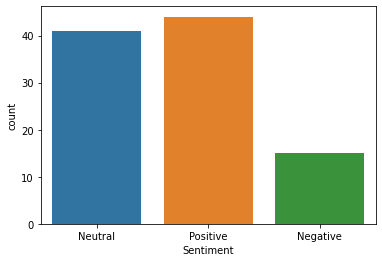

In [12]:
sns.countplot(x=tweet_data["Sentiment"],data= tweet_data)

#### Conclusion:

In [13]:
print("Sentiment conclusion:")
if pos_count > neu_count and pos_count > neg_count :
  print("Happy")
elif neg_count > neu_count and neg_count > pos_count :
  print("Sad")
else :
  print("Neutral")

Sentiment conclusion:
Happy


#### Wordcloud:

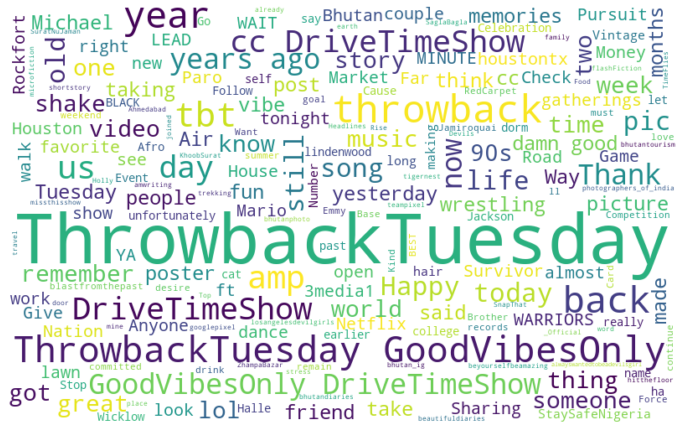

In [14]:
all_words = ' '.join([text for text in tweet_data['Content']])
wordcloud = WordCloud(background_color = 'white',width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(12,18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()